In [1]:
import sys
sys.path.insert(0, "/Users/aimachine/PyImage/utils")
import numpy as np
from PIL import Image
import os
from tifffile import imread
import matplotlib.pyplot as plt
from Normalize import normalizeFloat, normalizeMinMax, Path, save_tiff_imagej_compatible
from plot_utils import singleplot, plotXY, doubleplot
from GaussFit import StripFit, Linescan
from HoughLine import show_hough_linetransform, show_ransac_points_line, show_plot
from bokeh.models import Label
from bokeh.plotting import figure, show, output_notebook
from IPython.display import clear_output
from bokeh.models import Range1d
import csv
from GaussFit import MakePath

/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed

In [2]:
targetdir = '/Users/aimachine/Documents/New_Folder/LineScanTest/Fits4times16/'

Actinimage = '/Users/aimachine/Documents/New_Folder/Results4times16/Ch1LineScan_C2-1900408_4x16TrackID1.tif'

Membraneimage = '/Users/aimachine/Documents/New_Folder/Results4times16/Ch2LineScan_C2-1900408_4x16TrackID1.tif'

#Enter time unit in seconds
Time_unit = 5
#Enter pixel to micrometer conversion
Xcalibration = 0.1032
#Enter the number of pixels to be included in the fit
Fitaround= 10

#Symmetric psf as input (micrometers)
psf = 0.17
showaftertime = 10
inisigmaguess =  psf
#Size of linescan
skip = 50
singleblock = 80 

#Number of segments
numsegments = 10
id = []
for i in range(0, numsegments):
    id.append(i)
    
MakePath(targetdir)    
save_dir = targetdir + 'ls_data'    
MakePath(save_dir)


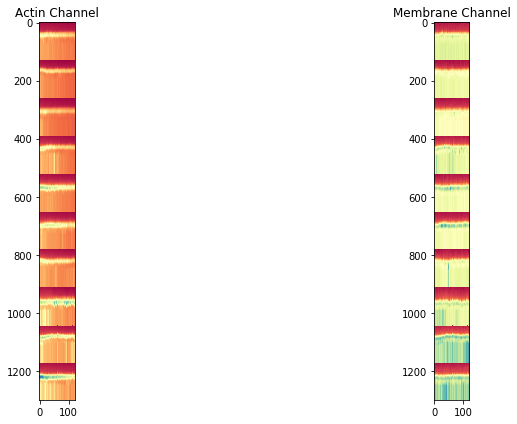

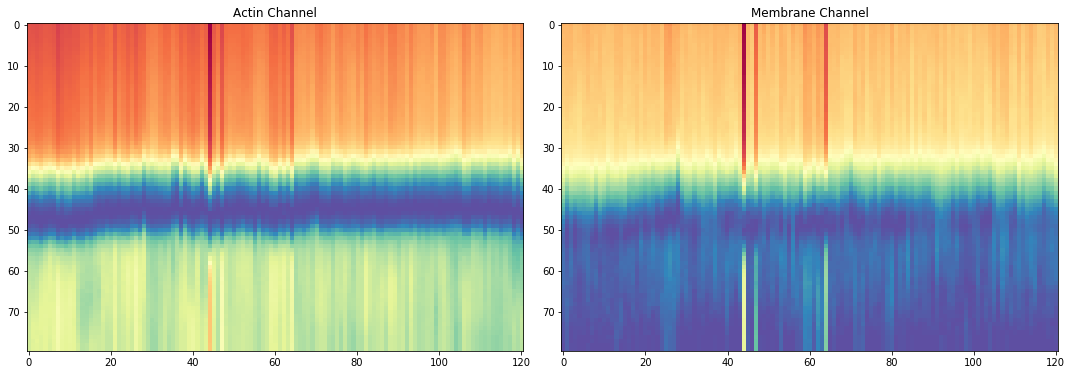

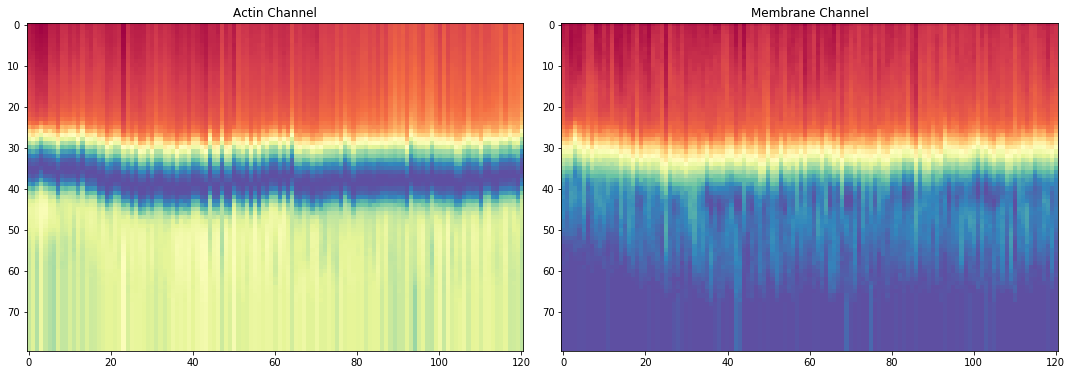

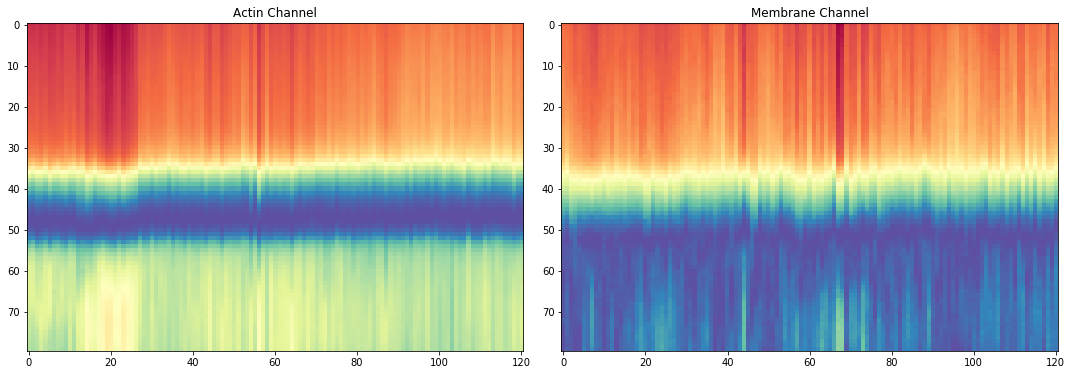

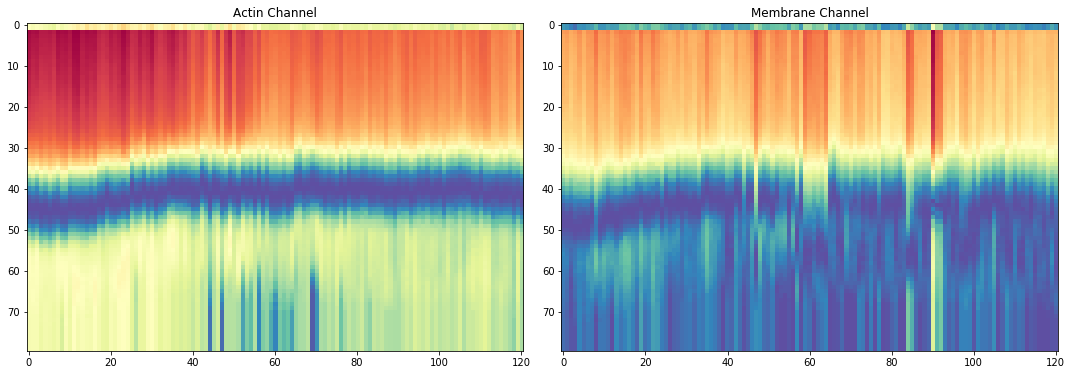

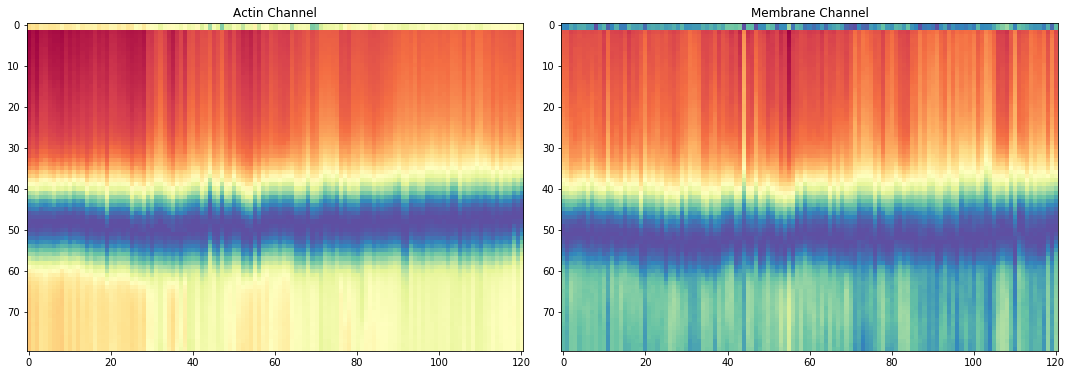

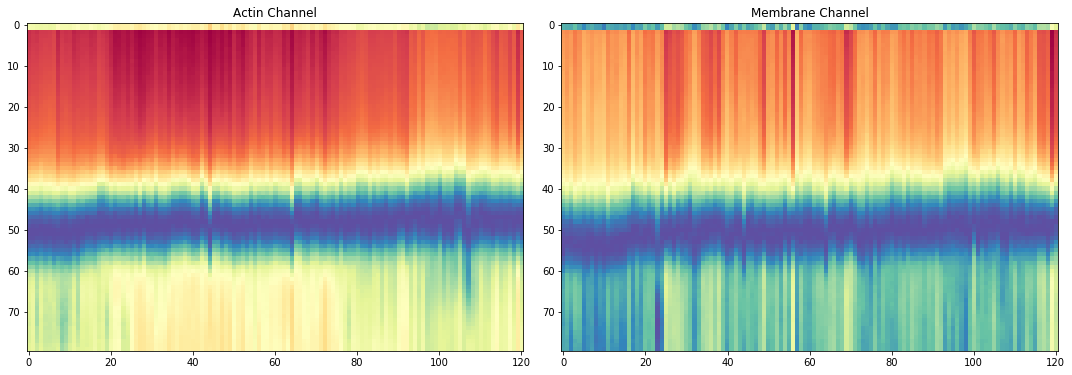

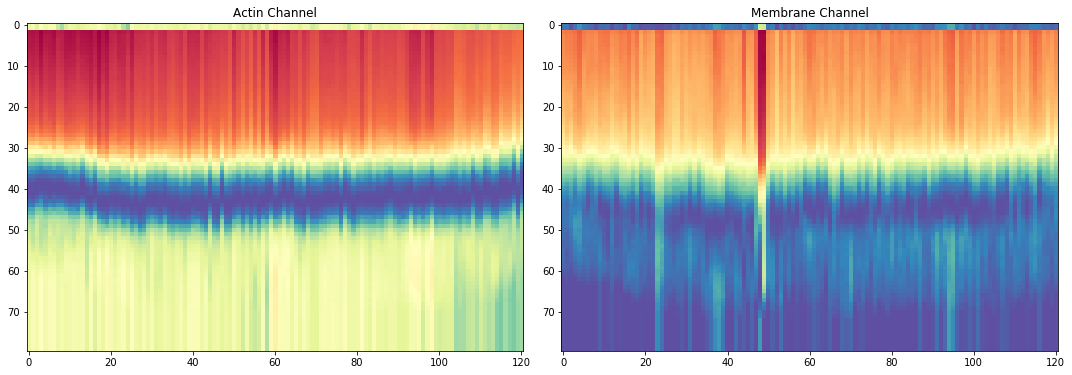

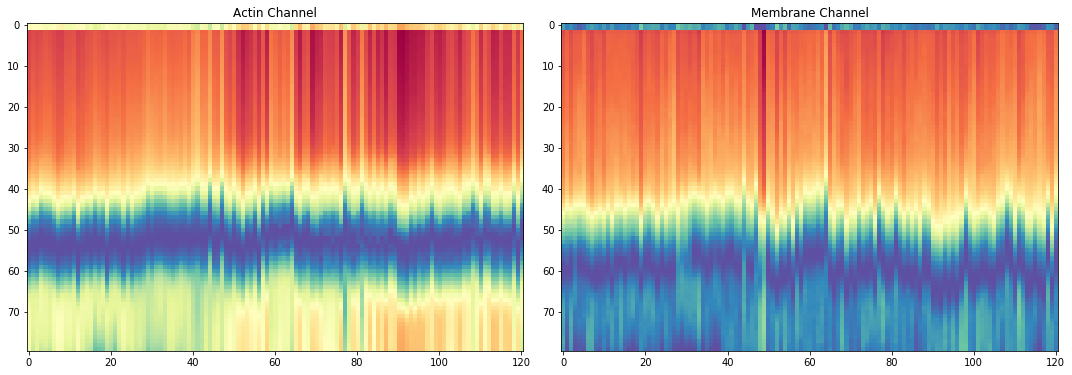

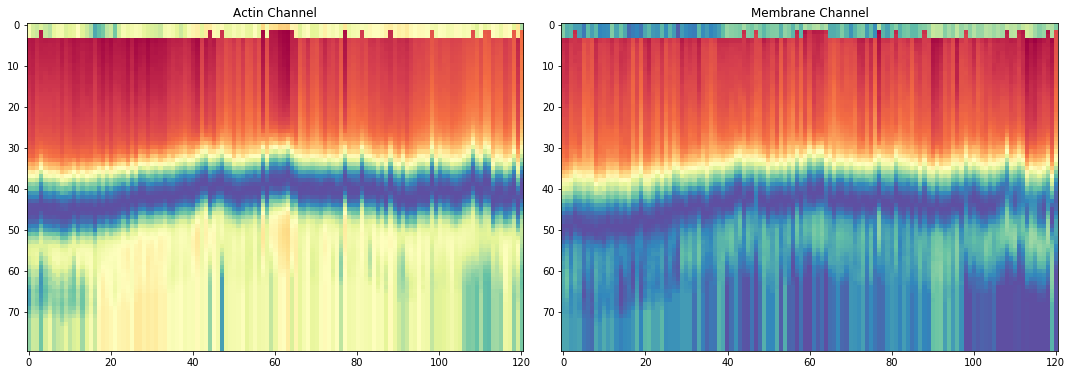

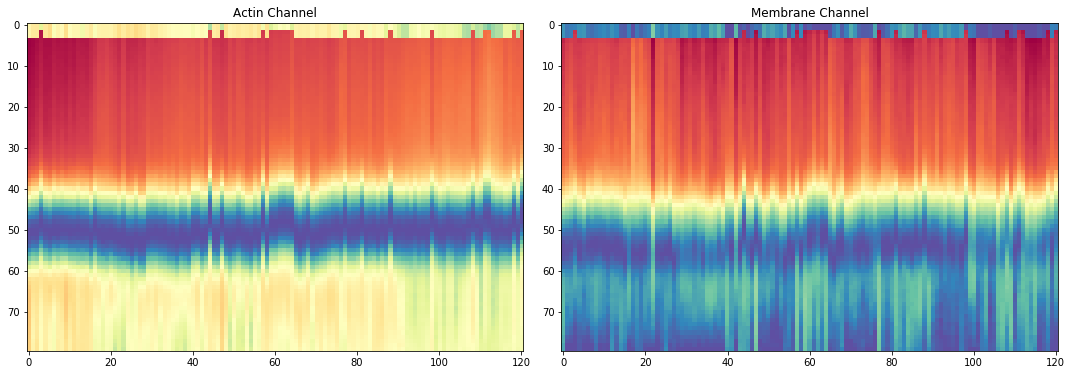

In [3]:
Actin = imread(Actinimage)
Membrane = imread(Membraneimage)

doubleplot(Actin, Membrane, 'Actin Channel', 'Membrane Channel')
blockimageActin = []
blockimageMembrane = []

i = 0
while i < Actin.shape[0]:
       
   blockActin = Actin[i:i + singleblock,:]/np.amax(Actin[i:i + singleblock,:], 0)
   blockMembrane = Membrane[i:i + singleblock,:]/np.amax(Membrane[i:i + singleblock,:],0)
   
   blockimageActin.append(blockActin)
   blockimageMembrane.append(blockMembrane)
   doubleplot(blockActin, blockMembrane, 'Actin Channel', 'Membrane Channel')
   i = i + singleblock + skip 

halflength = int(len(blockimageActin)/2)
otherhalf = len(blockimageActin) - halflength
totallength = len(blockimageActin)


block id 1


/Users/aimachine/PyImage/utils/GaussFit.py:352: RuntimeWarning: invalid value encountered in true_divide
  m_right = (self.i[self.right_index_right] - self.i[self.right_index_left]) / (self.x[self.right_index_right] - self.x[self.right_index_left])
/Users/aimachine/PyImage/utils/GaussFit.py:336: RuntimeWarning: invalid value encountered in true_divide
  m_left = (self.i[self.left_index_right] - self.i[self.left_index_left]) /  (self.x[self.left_index_right] - self.x[self.left_index_left])


Time point: 10
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 7.75017632e+03  1.68326719e+01  4.90534748e+00 -1.82684888e+02]
Actin Fit: [1.7237511  1.65583334 5.3026368  0.58126077]


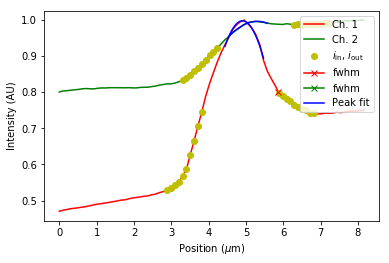

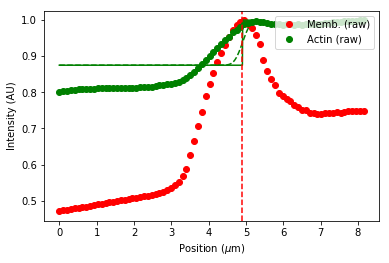

Thickness (nm), center cortex , cortical actin intensity (from fit) 521.466128931424 5.166080545044688 1.0002546744551695
Time point: 20
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 1.14964144e+04  2.03347539e+01  4.66551697e+00 -2.24541674e+02]
Actin Fit: [0.02559138 0.35167472 5.08751061 0.96998913]


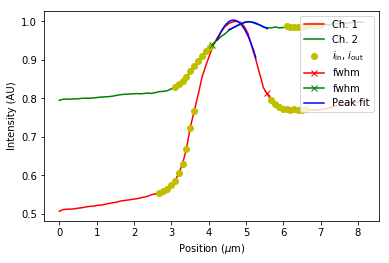

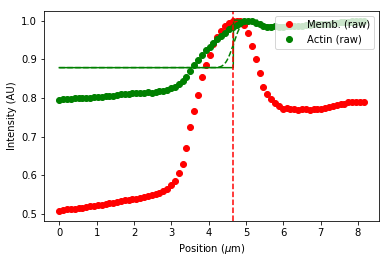

Thickness (nm), center cortex , cortical actin intensity (from fit) 642.2724007454798 4.986653170367092 1.0010952549920666
Time point: 30
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 9.28808261e+03  1.95996140e+01  4.67685672e+00 -1.88053163e+02]
Actin Fit: [346.99476226  10.11538829   5.16114998 -12.69448457]


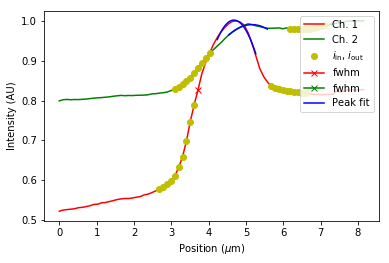

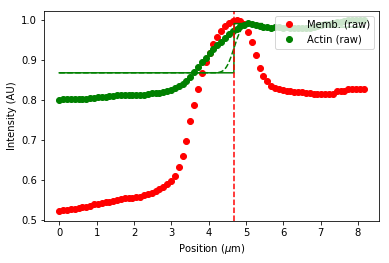

Thickness (nm), center cortex , cortical actin intensity (from fit) 773.0636098293252 5.063388526680843 0.9913658316485361
Time point: 40
Membrane Fit: (Amp, Sigma, PeakPos, C) [1635.85098283   10.89797624    4.73035876  -58.88455331]
Actin Fit: [0.06897837 0.52451014 5.02524074 0.94815035]


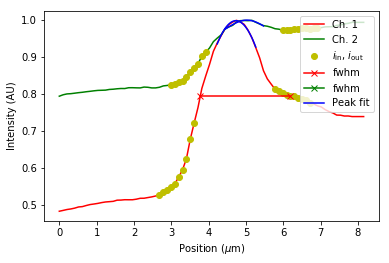

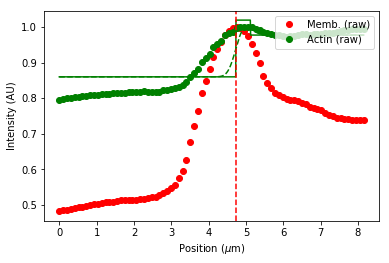

Thickness (nm), center cortex , cortical actin intensity (from fit) 394.26900330223356 4.927493257228614 1.0189209783321993
Time point: 50
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 1.11240057e+04  2.11800847e+01  4.66917037e+00 -2.08526501e+02]
Actin Fit: [0.59866797 1.18420627 5.1630578  0.79565507]


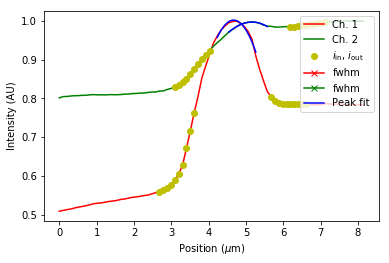

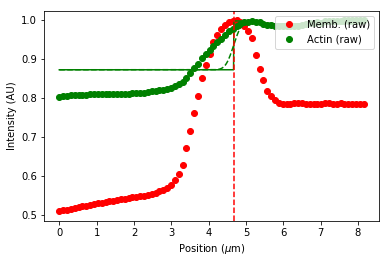

Thickness (nm), center cortex , cortical actin intensity (from fit) 777.0317293492303 5.057686238562578 0.9979215580241124
Time point: 60
Membrane Fit: (Amp, Sigma, PeakPos, C) [0.35796678 0.6369143  4.76756104 0.77623557]
Actin Fit: [0.05503711 0.4397678  5.01461176 0.94990036]


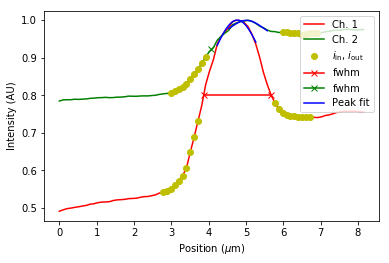

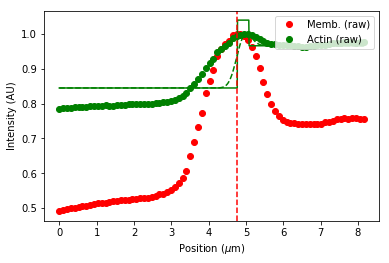

Thickness (nm), center cortex , cortical actin intensity (from fit) 316.3028019149728 4.925712440749227 1.039165947653985
Time point: 70
Membrane Fit: (Amp, Sigma, PeakPos, C) [0.7904799  0.82514751 4.47130316 0.61750247]
Actin Fit: [0.06561207 0.52024524 4.85574284 0.94922154]


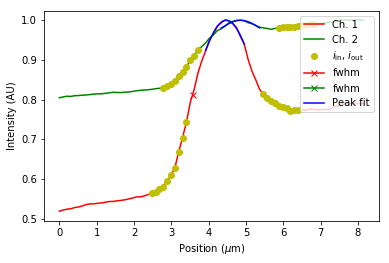

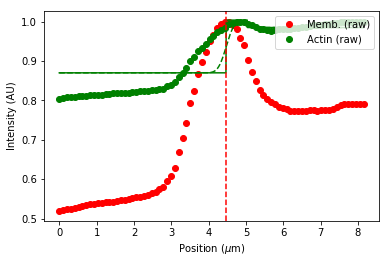

Thickness (nm), center cortex , cortical actin intensity (from fit) 569.9210270212234 4.756263678174047 1.003709910007824
Time point: 80
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 9.39357656e+03  1.99216027e+01  4.57025157e+00 -1.87110223e+02]
Actin Fit: [0.02880362 0.37923639 4.95615306 0.96897263]


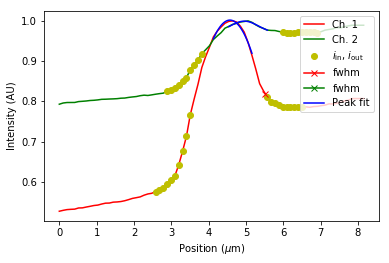

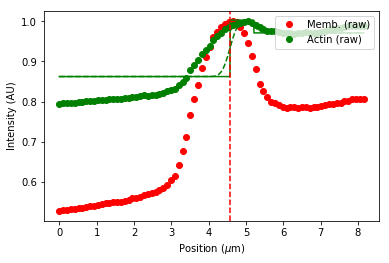

Thickness (nm), center cortex , cortical actin intensity (from fit) 637.1955902307859 4.8888493616481 1.0031286618791107
Time point: 110
Membrane Fit: (Amp, Sigma, PeakPos, C) [1337.47557486   10.23928828    4.57482791  -51.11134774]
Actin Fit: [1086.70141921   16.25027067    5.02446564  -25.68622749]


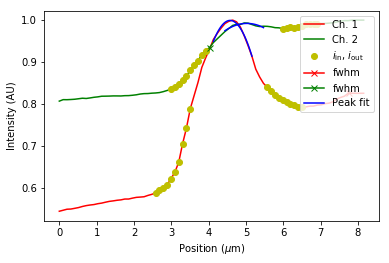

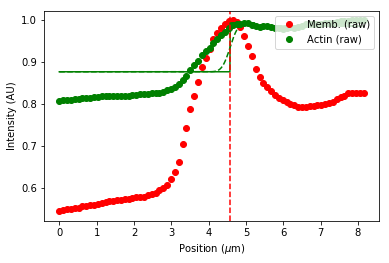

Thickness (nm), center cortex , cortical actin intensity (from fit) 658.546837990626 4.904101333271473 0.9934641541618999
Thickness (min) 196.15393783163594 nm
Thickness (median) 636.5513666667439 nm
Thickness (max) 1034.1750775000114 nm
Ransac Slope =  2.526e-05
Regression Slope =  2.526e-05
Mean Thickness (After outlier removal) =  0.614 um


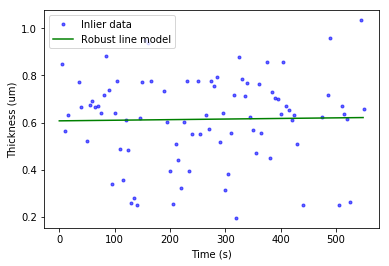

Loading BokehJS ...

block id 2


/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Time point: 30
Membrane Fit: (Amp, Sigma, PeakPos, C) [0.89617733 0.79075898 4.11897733 0.54776433]
Actin Fit: [34.90623324 22.60300519 17.03216209  0.44673008]


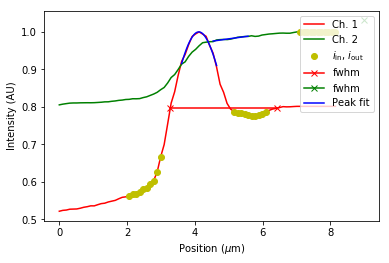

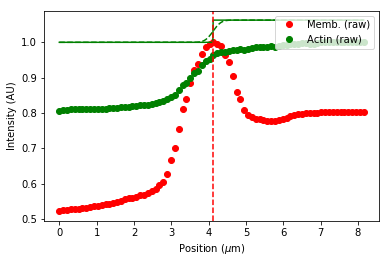

Thickness (nm), center cortex , cortical actin intensity (from fit) 25826.36952373896 17.032162088881634 1.0628239211184538
Time point: 40
Membrane Fit: (Amp, Sigma, PeakPos, C) [1.67735963 0.97491698 3.95004114 0.31499608]
Actin Fit: [1329.70881601   16.55178281    4.5202955   -31.06009903]


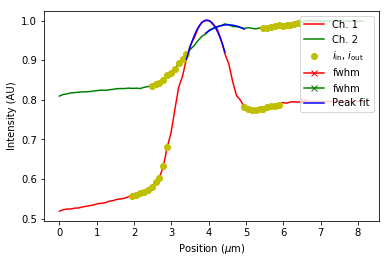

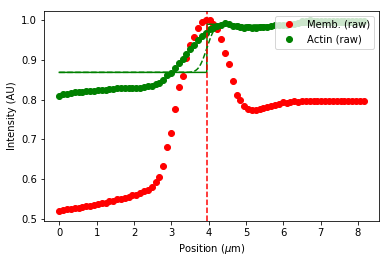

Thickness (nm), center cortex , cortical actin intensity (from fit) 878.385115790424 4.3892336963633305 0.9895705476474721
Time point: 70
Membrane Fit: (Amp, Sigma, PeakPos, C) [0.7785452  0.77093827 4.01142019 0.59754446]
Actin Fit: [436.07359888  10.5252433    4.4899533  -15.53046424]


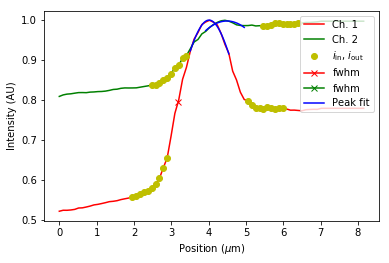

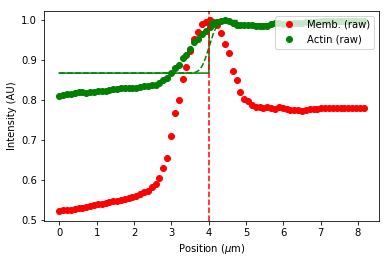

Thickness (nm), center cortex , cortical actin intensity (from fit) 747.9730828695662 4.385406729557305 0.9990163808382763
Time point: 100
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 4.80021662e+03  1.47681341e+01  3.92229399e+00 -1.28669970e+02]
Actin Fit: [3037.56882089   19.4046459     4.23319742  -61.45948527]


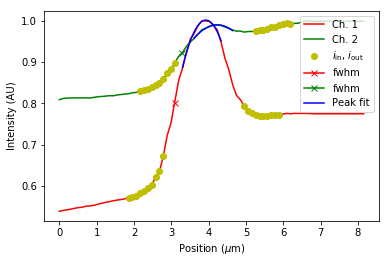

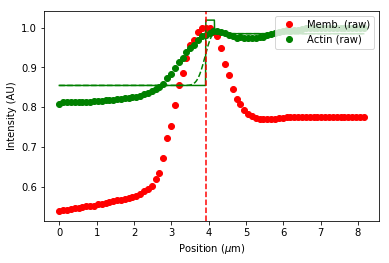

Thickness (nm), center cortex , cortical actin intensity (from fit) 235.02168207415352 4.039804833731182 1.0186467299643183
Time point: 110
Membrane Fit: (Amp, Sigma, PeakPos, C) [2.62348669 1.22622639 4.02503879 0.14600023]
Actin Fit: [643.09223734  14.67905452   4.59880674 -16.47834688]


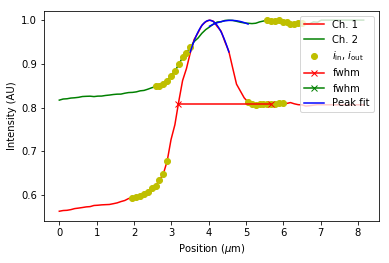

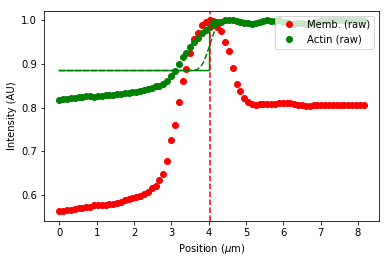

Thickness (nm), center cortex , cortical actin intensity (from fit) 941.6211643577842 4.495849373027474 0.9994956145358989
Thickness (min) 137.76063438565163 nm
Thickness (median) 647.2527844967929 nm
Thickness (max) 25826.36952373896 nm
Ransac Slope =  -9.581e-05
Regression Slope =  -5.226e-04
Mean Thickness (After outlier removal) =  0.634 um


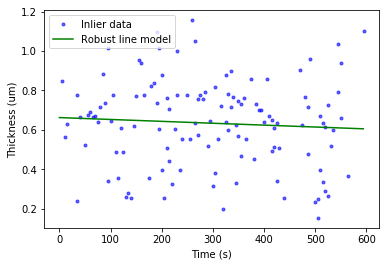

Loading BokehJS ...

block id 3
Time point: 0
Membrane Fit: (Amp, Sigma, PeakPos, C) [0.4192297  0.72145403 4.88295979 0.76670618]
Actin Fit: [0.11626014 0.64312621 5.45610052 0.9263803 ]


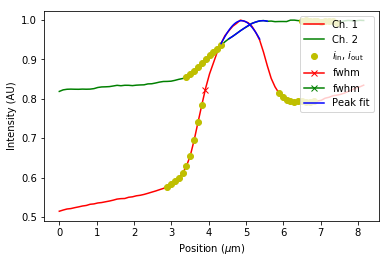

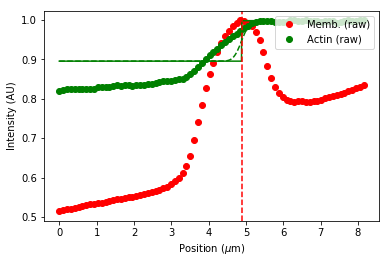

Thickness (nm), center cortex , cortical actin intensity (from fit) 865.3433911735644 5.31563148670811 0.9986025679839441
Time point: 20
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 6.44448324e+03  1.64072989e+01  5.01047459e+00 -1.55696066e+02]
Actin Fit: [0.48013758 1.13937866 5.59268648 0.83202548]


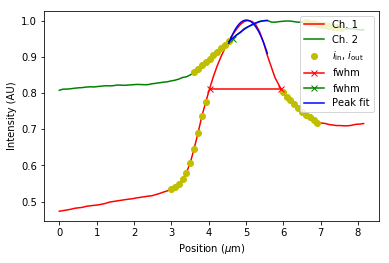

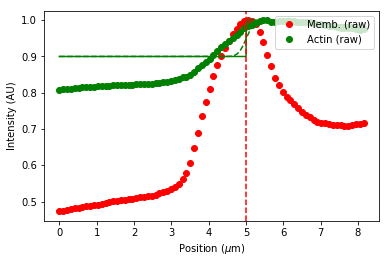

Thickness (nm), center cortex , cortical actin intensity (from fit) 1050.940340877549 5.5359447638212504 1.000208884074761
Time point: 30
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 7.68765177e+03  1.91776998e+01  4.77531398e+00 -1.58921292e+02]
Actin Fit: [0.97994277 1.44285665 5.28095705 0.72871866]


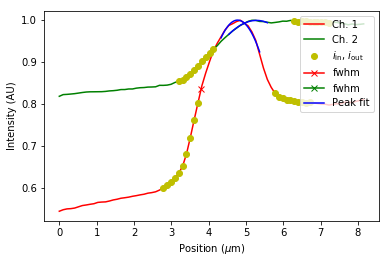

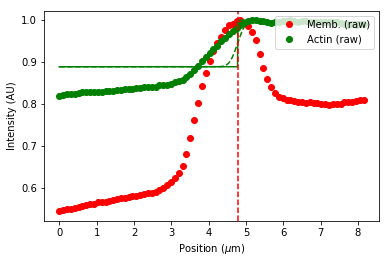

Thickness (nm), center cortex , cortical actin intensity (from fit) 756.2687868643396 5.153448370611034 1.0001095072986763
Time point: 40
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 6.01546215e+03  1.86907495e+01  4.82883512e+00 -1.27394201e+02]
Actin Fit: [0.20164495 0.80592783 5.29498244 0.89989727]


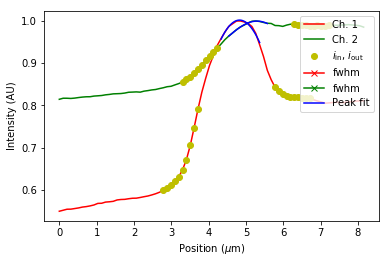

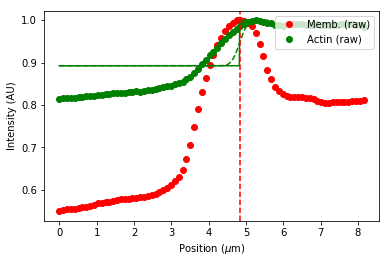

Thickness (nm), center cortex , cortical actin intensity (from fit) 756.6028486058744 5.207136539385567 1.0005152842192475
Time point: 60
Membrane Fit: (Amp, Sigma, PeakPos, C) [3546.08896169   15.31549404    4.82944531  -91.36922581]
Actin Fit: [0.46521509 1.24223943 5.60265941 0.8504944 ]


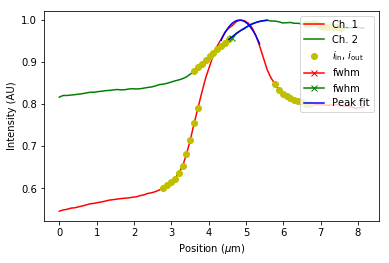

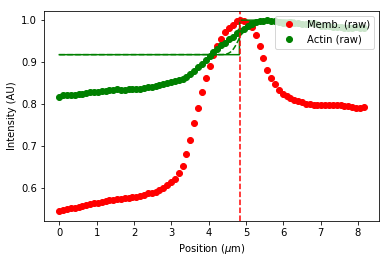

Thickness (nm), center cortex , cortical actin intensity (from fit) 1473.8781899499145 5.56638440200596 0.999897595776242
Time point: 70
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 6.72285646e+03  1.98306795e+01  4.77130781e+00 -1.34244636e+02]
Actin Fit: [0.14346519 0.60168131 5.36247332 0.90611488]


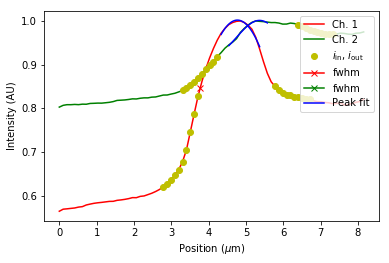

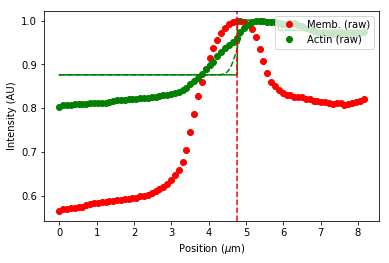

Thickness (nm), center cortex , cortical actin intensity (from fit) 1093.8931667301683 5.318254397847341 1.0013069511630348
Time point: 80
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 6.15443986e+03  1.89181952e+01  4.77983487e+00 -1.28782906e+02]
Actin Fit: [815.01626184  13.87490217   5.25933588 -22.43427946]


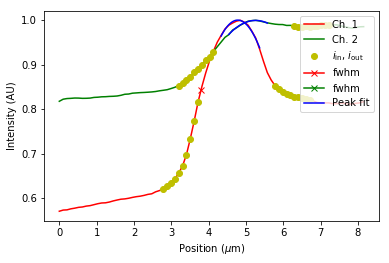

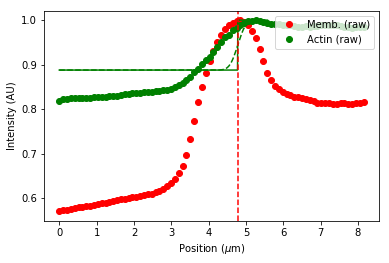

Thickness (nm), center cortex , cortical actin intensity (from fit) 804.7887935141382 5.182229270775485 1.0003549782894596
Time point: 90
Membrane Fit: (Amp, Sigma, PeakPos, C) [4313.79080781   16.60081771    4.81541389 -102.66737559]
Actin Fit: [0.5916059  1.20763615 5.3138133  0.80332061]


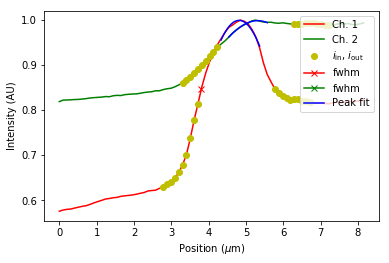

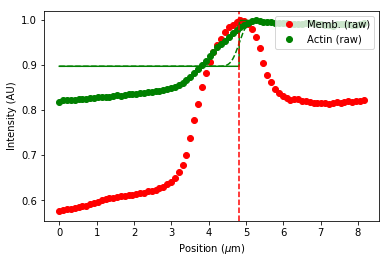

Thickness (nm), center cortex , cortical actin intensity (from fit) 815.3454187399522 5.223086598892773 0.9991733089579843
Time point: 100
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 6.34262955e+03  1.95928503e+01  4.76450000e+00 -1.28146282e+02]
Actin Fit: [2668.27875386   23.60204074    5.50533393  -44.1038628 ]


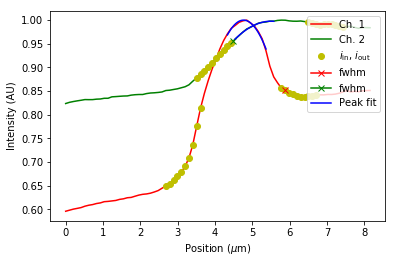

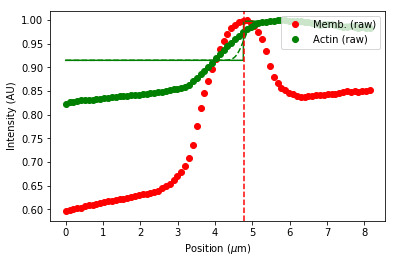

Thickness (nm), center cortex , cortical actin intensity (from fit) 1377.001841064114 5.453000916736581 0.9977133782390282
Time point: 110
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 6.29496839e+03  1.95959372e+01  4.80056841e+00 -1.27154534e+02]
Actin Fit: [0.10648093 0.66802103 5.43048996 0.93637591]


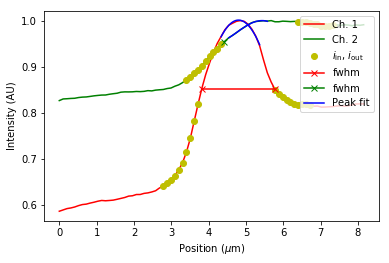

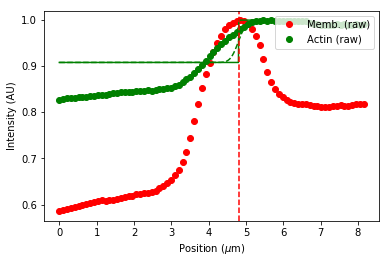

Thickness (nm), center cortex , cortical actin intensity (from fit) 1129.8324270133871 5.36548462745646 0.9999878694497671
Time point: 120
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 6.30874301e+03  1.91467628e+01  4.77408091e+00 -1.30448080e+02]
Actin Fit: [0.23494177 0.84144786 5.15764698 0.88806517]


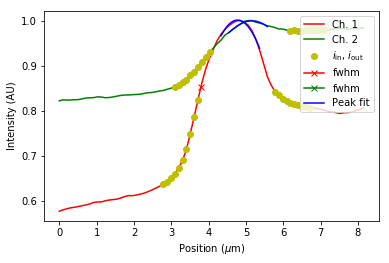

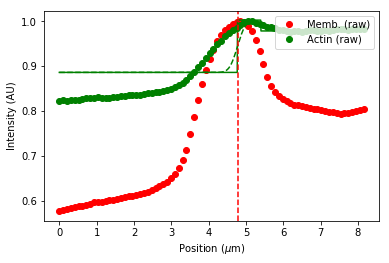

Thickness (nm), center cortex , cortical actin intensity (from fit) 620.551991263186 5.084356902875845 1.002831035563337
Thickness (min) 137.76063438565163 nm
Thickness (median) 763.076778280346 nm
Thickness (max) 25826.36952373896 nm
Ransac Slope =  2.839e-04
Regression Slope =  3.650e-05
Mean Thickness (After outlier removal) =  0.777 um


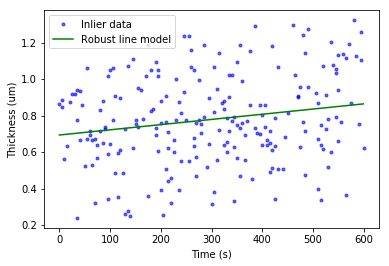

Loading BokehJS ...

block id 4
Time point: 0
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 3.78540008  1.35881347  4.587929   -0.11053618]
Actin Fit: [0.08636716 0.61134093 4.94529479 0.94341352]


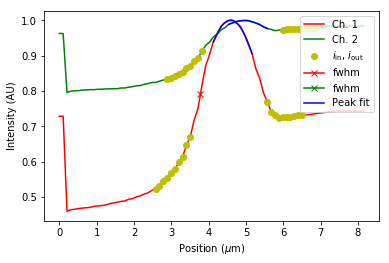

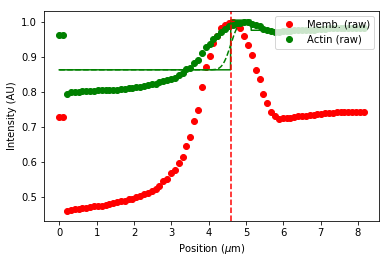

Thickness (nm), center cortex , cortical actin intensity (from fit) 546.7595165602781 4.861308754516032 1.0061453814824737
Time point: 10
Membrane Fit: (Amp, Sigma, PeakPos, C) [2.47987328 1.16459568 4.58888836 0.15101664]
Actin Fit: [1.41428511 1.40828277 4.8922227  0.59985317]


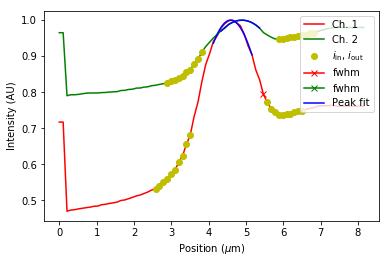

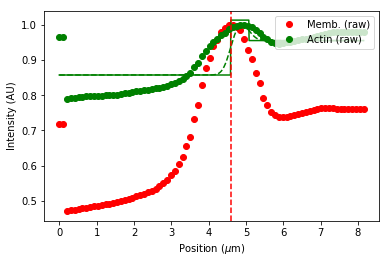

Thickness (nm), center cortex , cortical actin intensity (from fit) 490.24450508231314 4.834010611464362 1.0142072142350147
Time point: 20
Membrane Fit: (Amp, Sigma, PeakPos, C) [0.53907654 0.67714519 4.4691056  0.68237527]
Actin Fit: [3118.42667245   17.62868265    4.66211953  -69.57024047]


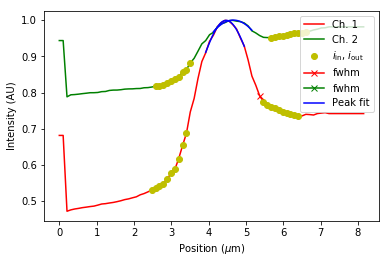

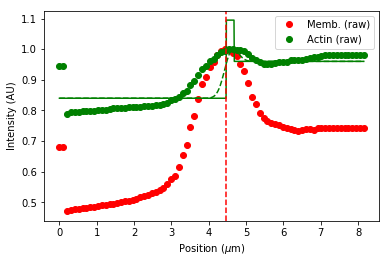

Thickness (nm), center cortex , cortical actin intensity (from fit) 211.38802173939564 4.5747996112157 1.0948335152906847
Time point: 30
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 5.47451713  1.45434379  4.23062018 -0.50302704]
Actin Fit: [0.07272875 0.48727378 4.49895965 0.9401544 ]


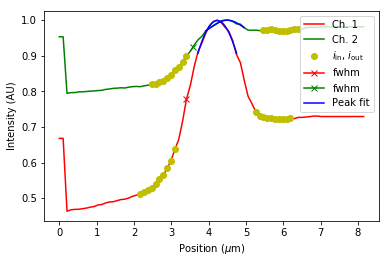

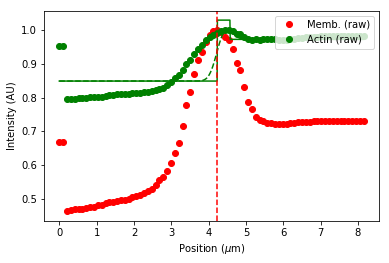

Thickness (nm), center cortex , cortical actin intensity (from fit) 341.684633143524 4.401462501421863 1.0289760897249818
Time point: 40
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 4.71060296e+03  1.45802256e+01  4.22581959e+00 -1.27889681e+02]
Actin Fit: [2774.53301154   21.12535348    4.68705637  -51.39515537]


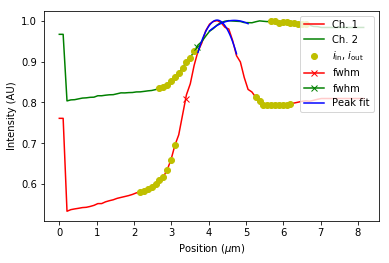

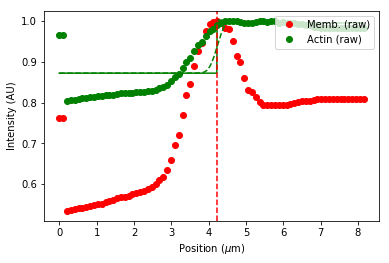

Thickness (nm), center cortex , cortical actin intensity (from fit) 667.8870427619561 4.559763115543945 1.0017845010097368


In [ ]:
%%time
#Fit all blocks

Thickness = []
Time = []
for i in range(0, totallength):
 print('block id', i+1)   
 Actin = blockimageActin[i]
 Membrane = blockimageMembrane[i]
 
 StripFit(Actin, Membrane, Time_unit, Xcalibration, Fitaround, psf, inisigmaguess, showaftertime, Thickness, Time)
 


 print("Thickness (min)",np.min(Thickness) *1000, "nm")
 print("Thickness (median)",np.median(Thickness) *1000, "nm")
 print("Thickness (max)",np.max(Thickness) *1000, "nm")
 Thickness_time = np.column_stack([Time, Thickness]) 

 show_ransac_points_line(Thickness_time, min_samples=2, residual_threshold=0.5, max_trials=1000, Xrange = Time[-1], displayoutlier = False)
    
    

 hist, edges = np.histogram((Thickness), density=False, bins='auto')
 p = figure(title="Estimated Cortex Thickness = " + str('%.5f'%np.abs(edges[np.argmax(hist)] * 1000)) + 'nm', y_axis_label='Counts',x_axis_label='Thickness(um)',x_range=Range1d(0.01, 0.2))
 listedges = edges.tolist()
 listhist = hist.tolist()
 output_notebook()
 p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
    fill_color="#036564", line_color="#033649")
 for  i in range(0,len(listhist)):
  if listhist[i] > 0:
   mytext = Label(x=listedges[i], y=listhist[i], text=str('%.4f'%listedges[i]))
   p.add_layout(mytext)
 show(p)

 #clear_output(wait = True)
    


In [ ]:
show_ransac_points_line(Thickness_time, min_samples=2, residual_threshold=0.5, max_trials=1000, Xrange = Time[-1], displayoutlier = False)
    
    

hist, edges = np.histogram((Thickness), density=False, bins='auto')
p = figure(title="Estimated Cortex Thickness = " + str('%.5f'%np.abs(edges[np.argmax(hist)] * 1000)) + 'nm', y_axis_label='Counts',x_axis_label='Thickness(um)',x_range=Range1d(0.01, 0.2))
listedges = edges.tolist()
listhist = hist.tolist()
output_notebook()
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
    fill_color="#036564", line_color="#033649")
for  i in range(0,len(listhist)):
  if listhist[i] > 0:
   mytext = Label(x=listedges[i], y=listhist[i], text=str('%.4f'%listedges[i]))
   p.add_layout(mytext)
show(p)    


In [ ]:

master_data= []

Path(save_dir).mkdir(exist_ok = True)

for line in Thickness_time:
    master_data.append(line)
writer = csv.writer(open(save_dir + "/" + (os.path.basename(Actinimage))  +".csv", "w"))
writer.writerows(master_data)  

In [ ]:
show_plot(Thickness_time,  ymin = 0, ymax = 0.25)
